In [1]:
import os, pandas as pd
import pickle    

def save_combat_df_list_to_pickle(combat_df_list, path):
    with open(path, 'wb') as f:
        pickle.dump(combat_df_list, f)
    print("Save to", path)
    
def load_combat_df_list_from_pickle(path):
    with open(path, 'rb') as f:
        return pickle.load(f)
    
combat_list_imms = load_combat_df_list_from_pickle('combat_df_list_imms.pkl')
combat_list_imms_1 = load_combat_df_list_from_pickle('combat_df_list_imms_1.pkl')
print(combat_list_imms_1[0][0])


                                                      text  \
id                                                           
cvs92ym  &gt;So within our predefined two genders, we h...   
cvstt70  &gt; But saying you're a boy because you act m...   
cvsvr2g  Because I have a penis, and balls, and my chro...   
cvsvwuy  &gt; Because I have a penis, and balls, and my...   
cvsxaph  Like I said a million times before. Exceptions...   

                                                     agu_1  \
id                                                           
cvs92ym  {"summarization": "The speaker expresses frust...   
cvstt70  {"summarization": "The speaker expresses stron...   
cvsvr2g  I cannot summarize the Reddit speaker's emotio...   
cvsvwuy  {"summarization": "The speaker expresses frust...   
cvsxaph  {"summarization": "The speaker is likely frust...   

                                                     imm_1  imm_1_check  
id                                                      

In [5]:
for sub1, sub2 in zip(combat_list_imms, combat_list_imms_1):
    for df1,df2 in zip(sub1, sub2):
        df1['imm_1'] = df2['imm_1']
        df1['imm_1_check'] = df2['imm_1_check']
        
print(combat_list_imms[0][0].head())
save_combat_df_list_to_pickle(combat_list_imms, 'combat_df_list_imms_merged.pkl')

                                                      text  \
id                                                           
cvs92ym  &gt;So within our predefined two genders, we h...   
cvstt70  &gt; But saying you're a boy because you act m...   
cvsvr2g  Because I have a penis, and balls, and my chro...   
cvsvwuy  &gt; Because I have a penis, and balls, and my...   
cvsxaph  Like I said a million times before. Exceptions...   

                                                     agu_1  \
id                                                           
cvs92ym  {"summarization": "The speaker expresses frust...   
cvstt70  {"summarization": "The speaker expresses stron...   
cvsvr2g  I cannot summarize the Reddit speaker's emotio...   
cvsvwuy  {"summarization": "The speaker expresses frust...   
cvsxaph  {"summarization": "The speaker is likely frust...   

                                                       imm  imm_check  \
id                                                       

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import time
import pickle

# 加载停用词
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(tokens)

def save_LDA_result_different_imms(combat_list_imms,  path, txt_col = 'text',):
    documents = []
    for sublist in combat_list_imms:
        combined_text = ' '.join([preprocess(utt) for df in sublist for utt in df[txt_col]])
        documents.append(combined_text)
    
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(documents)
    
    n_topics_list = list(range(1, 21))
    results = []
    
    # iterate and save variables
    for i, n_topics in enumerate(n_topics_list):
        start_time = time.time()
        print(f"Processing {i+1}/{len(n_topics_list)}: n_topics = {n_topics}")
        
        lda = LatentDirichletAllocation(n_components=n_topics, random_state=42, max_iter=100)
        lda.fit(X)
        
        # 保存结果
        topics = []
        for topic_idx, topic in enumerate(lda.components_):
            topics.append([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])
        
        result = {
            'n_topics': n_topics,
            'model': lda,
            'topics': topics,
            'perplexity': lda.perplexity(X),
            'vectorizer': vectorizer
        }
        
        results.append(result)
        
        end_time = time.time()
        print(f"n_topics = {n_topics} completed. Perplexity = {result['perplexity']:.2f}. Time taken: {end_time - start_time:.2f} seconds\n")
    
    # 使用pickle保存结果
    with open(path, 'wb') as f:
        pickle.dump(results, f)
    
    print("Results have been saved to", path)

save_LDA_result_different_imms(combat_list_imms, 'LDA_results_imms_text.pkl', txt_col='text')
save_LDA_result_different_imms(combat_list_imms, 'LDA_results_imms_imm.pkl', txt_col='imm')
save_LDA_result_different_imms(combat_list_imms, 'LDA_results_imms.pkl', txt_col='imm_1')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\L\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\L\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Processing 1/20: n_topics = 1
n_topics = 1 completed. Perplexity = 3342.06. Time taken: 0.68 seconds

Processing 2/20: n_topics = 2
n_topics = 2 completed. Perplexity = 3146.57. Time taken: 8.12 seconds

Processing 3/20: n_topics = 3
n_topics = 3 completed. Perplexity = 3102.17. Time taken: 7.51 seconds

Processing 4/20: n_topics = 4
n_topics = 4 completed. Perplexity = 3093.10. Time taken: 6.64 seconds

Processing 5/20: n_topics = 5
n_topics = 5 completed. Perplexity = 3131.21. Time taken: 7.22 seconds

Processing 6/20: n_topics = 6
n_topics = 6 completed. Perplexity = 3109.15. Time taken: 6.93 seconds

Processing 7/20: n_topics = 7
n_topics = 7 completed. Perplexity = 3090.35. Time taken: 7.02 seconds

Processing 8/20: n_topics = 8
n_topics = 8 completed. Perplexity = 3081.04. Time taken: 7.19 seconds

Processing 9/20: n_topics = 9
n_topics = 9 completed. Perplexity = 3080.02. Time taken: 7.20 seconds

Processing 10/20: n_topics = 10
n_topics = 10 completed. Perplexity = 3047.37. Tim

In [2]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def visualize_LDA_perplexity_from_results_list(results_list, title):
    n_topics_list = [result['n_topics'] for result in results_list]
    perplexity_list = [result['perplexity'] for result in results_list]
    
    plt.plot(n_topics_list, perplexity_list, marker='o')
    plt.title(title)
    plt.xlabel('Number of Topics')
    plt.ylabel('Perplexity')
    plt.xticks(np.arange(1, max(n_topics_list)+1, 1))
    plt.show()


def get_duplicate_keywords(results_list):
    all_keywords = []
    for result in results_list:
        for topic in result['topics']:
            all_keywords.extend(topic)
    
    keyword_counts = Counter(all_keywords)
    repeated_keywords = {keyword: count for keyword, count in keyword_counts.items() if count > 1}
    
    return repeated_keywords

def get_duplicate_top_words_save(results_list, n_topics):
    for result in results_list:
        
        def print_top_words(model, feature_names, n_top_words):
            topic_keywords = []
            for topic_idx, topic in enumerate(model.components_):
                keywords = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
                topic_keywords.append(keywords)
                print(f"Topic #{topic_idx}: {', '.join(keywords)}")
            return topic_keywords
        
        # 使用结果中的 vectorizer 和 model
        vectorizer = result['vectorizer']
        lda_model = result['model']
        
        feature_names = vectorizer.get_feature_names_out()
        
        n_top_words = 10
        topic_keywords = print_top_words(lda_model, feature_names, n_top_words)
        
        all_keywords = [keyword for topic in topic_keywords for keyword in topic]
        keyword_counts = Counter(all_keywords)
        repeated_keywords = {keyword: count for keyword, count in keyword_counts.items() if count >= 1}
        
        sorted_repeated_keywords = dict(sorted(repeated_keywords.items(), key=lambda item: item[1], reverse=True))
        print("Repeated Keywords:", sorted_repeated_keywords)
        result['repeated_keywords'] = sorted_repeated_keywords
    return results_list

def load_LDA_results(path):
    with open(path, 'rb') as f:
        return pickle.load(f)

In [3]:
def vas(path, title = 'Perplexity of LDA Models with Different Number of Topics'):
    results_list = load_LDA_results(path)
    visualize_LDA_perplexity_from_results_list(results_list, title)
    results_list = get_duplicate_top_words_save(results_list, 10)
    with open(path[:-4]+'_counted.pkl', 'wb') as f:
        pickle.dump(results_list, f)

In [4]:
words_to_ignore = [
    'would', 'people', 'like', 'one', 'think', 'someone', 'even', 'however',
    'get', 'gt', 
]

from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
from gensim.models import LdaModel

def preprocess_text(text, words_to_ignore):
    tokens = simple_preprocess(text)
    return ' '.join([word for word in tokens if word not in words_to_ignore])

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import time
import pickle

# 加载停用词
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(tokens)

def save_LDA_result_different_imms(combat_list_imms,  path, txt_col = 'text',):
    documents = []
    for sublist in combat_list_imms:
        combined_text = ' '.join([preprocess_text(preprocess(utt), words_to_ignore) for df in sublist for utt in df[txt_col]])
        # combined_text = preprocess_text(combined_text, words_to_ignore)
        documents.append(combined_text)
    
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(documents)
    
    n_topics_list = list(range(1, 21))
    results = []
    
    # iterate and save variables
    for i, n_topics in enumerate(n_topics_list):
        start_time = time.time()
        print(f"Processing {i+1}/{len(n_topics_list)}: n_topics = {n_topics}")
        
        lda = LatentDirichletAllocation(n_components=n_topics, random_state=42, max_iter=100)
        lda.fit(X)
        
        # 保存结果
        topics = []
        for topic_idx, topic in enumerate(lda.components_):
            topics.append([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])
        
        result = {
            'n_topics': n_topics,
            'model': lda,
            'topics': topics,
            'perplexity': lda.perplexity(X),
            'vectorizer': vectorizer
        }
        
        results.append(result)
        
        end_time = time.time()
        print(f"n_topics = {n_topics} completed. Perplexity = {result['perplexity']:.2f}. Time taken: {end_time - start_time:.2f} seconds\n")
    
    # 使用pickle保存结果
    with open(path, 'wb') as f:
        pickle.dump(results, f)
    
    print("Results have been saved to", path)

save_LDA_result_different_imms(combat_list_imms, 'LDA_results_imms_text_1.pkl', txt_col='text')
save_LDA_result_different_imms(combat_list_imms, 'LDA_results_imms_imm_1.pkl', txt_col='imm')
save_LDA_result_different_imms(combat_list_imms, 'LDA_results_imms_1.pkl', txt_col='imm_1')

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x00000216082ACD90>>
Traceback (most recent call last):
  File "C:\Users\L\anaconda3\envs\Raja\Lib\site-packages\ipykernel\ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


KeyboardInterrupt: 

In [5]:
combat_list_imms=load_combat_df_list_from_pickle('combat_df_list_imms_merged.pkl')

words_to_ignore = [
    'would', 'people', 'like', 'one', 'think', 'someone', 'even', 'however',
    'get', 'gt', 
]

from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
from gensim.models import LdaModel

def preprocess_text(text, words_to_ignore):
    tokens = simple_preprocess(text)
    return ' '.join([word for word in tokens if word not in words_to_ignore])

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import time
import pickle

# 加载停用词
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(tokens)

def save_LDA_result_different_imms(combat_list_imms,  path, txt_col = 'text',imm_comparision=None):
    documents = []
    for sublist in combat_list_imms:
        if imm_comparision is not None:
            combined_text = ' '.join([preprocess_text(preprocess(utt), words_to_ignore) for df in sublist for utt in df[df[imm_comparision+ '_check'] == 1]['text']])
        else:
            if txt_col != 'text':
                combined_text = ' '.join([preprocess_text(preprocess(utt), words_to_ignore) for df in sublist for utt in df[df[txt_col+ '_check'] == 1][txt_col]])
            else:
                combined_text = ' '.join([preprocess_text(preprocess(utt), words_to_ignore) for df in sublist for utt in df[txt_col]])
        # combined_text = preprocess_text(combined_text, words_to_ignore)
        documents.append(combined_text)
    
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(documents)
    
    n_topics_list = list(range(1, 21))
    results = []
    
    # iterate and save variables
    for i, n_topics in enumerate(n_topics_list):
        start_time = time.time()
        print(f"Processing {i+1}/{len(n_topics_list)}: n_topics = {n_topics}")
        
        lda = LatentDirichletAllocation(n_components=n_topics, random_state=42, max_iter=100)
        lda.fit(X)
        
        # 保存结果
        topics = []
        for topic_idx, topic in enumerate(lda.components_):
            topics.append([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])
        
        result = {
            'n_topics': n_topics,
            'model': lda,
            'topics': topics,
            'perplexity': lda.perplexity(X),
            'vectorizer': vectorizer
        }
        
        results.append(result)
        
        end_time = time.time()
        print(f"n_topics = {n_topics} completed. Perplexity = {result['perplexity']:.2f}. Time taken: {end_time - start_time:.2f} seconds\n")
    
    # 使用pickle保存结果
    with open(path, 'wb') as f:
        pickle.dump(results, f)
    
    print("Results have been saved to", path)

# save_LDA_result_different_imms(combat_list_imms, 'LDA_results_imms_text_1.pkl', txt_col='text')
# save_LDA_result_different_imms(combat_list_imms, 'LDA_results_imms_imm_1_single.pkl', txt_col='imm')
# save_LDA_result_different_imms(combat_list_imms, 'LDA_results_imms_1_single.pkl', txt_col='imm_1')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\L\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\L\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
#rewrite to False
def save_LDA_result_different_imms(combat_list_imms,  path, txt_col = 'text',imm_comparision=None):
    documents = []
    for sublist in combat_list_imms:
        if imm_comparision is not None:
            combined_text = ' '.join([preprocess_text(preprocess(utt), words_to_ignore) for df in sublist for utt in df[df[imm_comparision+ '_check'] == 0]['text']])
        else:
            if txt_col != 'text':
                combined_text = ' '.join([preprocess_text(preprocess(utt), words_to_ignore) for df in sublist for utt in df[df[txt_col+ '_check'] == 0][txt_col]])
            else:
                combined_text = ' '.join([preprocess_text(preprocess(utt), words_to_ignore) for df in sublist for utt in df[txt_col]])
        # combined_text = preprocess_text(combined_text, words_to_ignore)
        documents.append(combined_text)
    
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(documents)
    
    n_topics_list = list(range(1, 21))
    results = []
    
    # iterate and save variables
    for i, n_topics in enumerate(n_topics_list):
        start_time = time.time()
        print(f"Processing {i+1}/{len(n_topics_list)}: n_topics = {n_topics}")
        
        lda = LatentDirichletAllocation(n_components=n_topics, random_state=42, max_iter=100)
        lda.fit(X)
        
        # 保存结果
        topics = []
        for topic_idx, topic in enumerate(lda.components_):
            topics.append([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])
        
        result = {
            'n_topics': n_topics,
            'model': lda,
            'topics': topics,
            'perplexity': lda.perplexity(X),
            'vectorizer': vectorizer
        }
        
        results.append(result)
        
        end_time = time.time()
        print(f"n_topics = {n_topics} completed. Perplexity = {result['perplexity']:.2f}. Time taken: {end_time - start_time:.2f} seconds\n")
    
    # 使用pickle保存结果
    with open(path, 'wb') as f:
        pickle.dump(results, f)
    
    print("Results have been saved to", path)

In [14]:
save_LDA_result_different_imms(combat_list_imms, 'LDA_results_imms_imm_1_single_com_reversed', imm_comparision='imm')
save_LDA_result_different_imms(combat_list_imms, 'LDA_results_imms_1_single_com_reversed', imm_comparision='imm_1')
save_LDA_result_different_imms(combat_list_imms, 'LDA_results_imms_imm_1_single_reversed', txt_col='imm')
save_LDA_result_different_imms(combat_list_imms, 'LDA_results_imms_1_single_reversed', txt_col='imm_1')


Processing 1/20: n_topics = 1
n_topics = 1 completed. Perplexity = 3503.36. Time taken: 0.63 seconds

Processing 2/20: n_topics = 2
n_topics = 2 completed. Perplexity = 3496.58. Time taken: 4.35 seconds

Processing 3/20: n_topics = 3
n_topics = 3 completed. Perplexity = 3569.83. Time taken: 3.62 seconds

Processing 4/20: n_topics = 4
n_topics = 4 completed. Perplexity = 3651.58. Time taken: 2.88 seconds

Processing 5/20: n_topics = 5
n_topics = 5 completed. Perplexity = 3715.55. Time taken: 2.76 seconds

Processing 6/20: n_topics = 6
n_topics = 6 completed. Perplexity = 3759.54. Time taken: 2.59 seconds

Processing 7/20: n_topics = 7
n_topics = 7 completed. Perplexity = 3816.52. Time taken: 2.51 seconds

Processing 8/20: n_topics = 8
n_topics = 8 completed. Perplexity = 3848.37. Time taken: 2.39 seconds

Processing 9/20: n_topics = 9
n_topics = 9 completed. Perplexity = 3906.97. Time taken: 2.40 seconds

Processing 10/20: n_topics = 10
n_topics = 10 completed. Perplexity = 4002.11. Tim

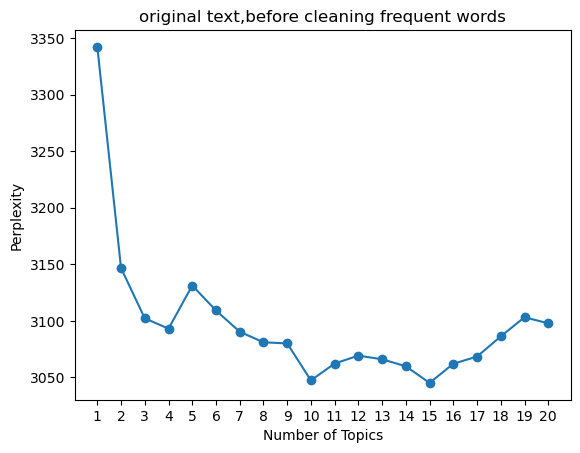

Topic #0: people, gt, would, like, think, one, even, make, get, point
Repeated Keywords: {'people': 1, 'gt': 1, 'would': 1, 'like': 1, 'think': 1, 'one': 1, 'even': 1, 'make': 1, 'get': 1, 'point': 1}
Topic #0: people, gt, would, think, like, right, one, get, even, make
Topic #1: people, gt, would, like, think, one, women, men, even, person
Repeated Keywords: {'people': 2, 'gt': 2, 'would': 2, 'think': 2, 'like': 2, 'one': 2, 'even': 2, 'right': 1, 'get': 1, 'make': 1, 'women': 1, 'men': 1, 'person': 1}
Topic #0: people, gt, would, like, think, right, one, get, government, even
Topic #1: gt, people, would, one, think, like, child, make, point, person
Topic #2: people, gt, would, like, think, women, one, men, someone, gender
Repeated Keywords: {'people': 3, 'gt': 3, 'would': 3, 'like': 3, 'think': 3, 'one': 3, 'right': 1, 'get': 1, 'government': 1, 'even': 1, 'child': 1, 'make': 1, 'point': 1, 'person': 1, 'women': 1, 'men': 1, 'someone': 1, 'gender': 1}
Topic #0: people, gt, would, rig

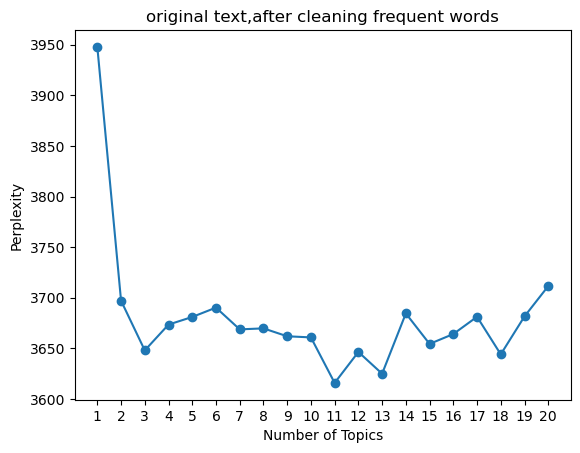

Topic #0: make, point, right, say, way, want, also, could, person, saying
Repeated Keywords: {'make': 1, 'point': 1, 'right': 1, 'say': 1, 'way': 1, 'want': 1, 'also': 1, 'could': 1, 'person': 1, 'saying': 1}
Topic #0: women, men, make, person, could, point, way, gender, child, woman
Topic #1: right, point, say, make, want, way, also, government, us, saying
Repeated Keywords: {'make': 2, 'point': 2, 'way': 2, 'women': 1, 'men': 1, 'person': 1, 'could': 1, 'gender': 1, 'child': 1, 'woman': 1, 'right': 1, 'say': 1, 'want': 1, 'also': 1, 'government': 1, 'us': 1, 'saying': 1}
Topic #0: women, men, person, gender, woman, make, sex, child, way, point
Topic #1: right, say, point, make, also, trump, want, us, way, said
Topic #2: want, point, right, way, make, something, could, saying, law, eat
Repeated Keywords: {'make': 3, 'way': 3, 'point': 3, 'right': 2, 'want': 2, 'women': 1, 'men': 1, 'person': 1, 'gender': 1, 'woman': 1, 'sex': 1, 'child': 1, 'say': 1, 'also': 1, 'trump': 1, 'us': 1, 's

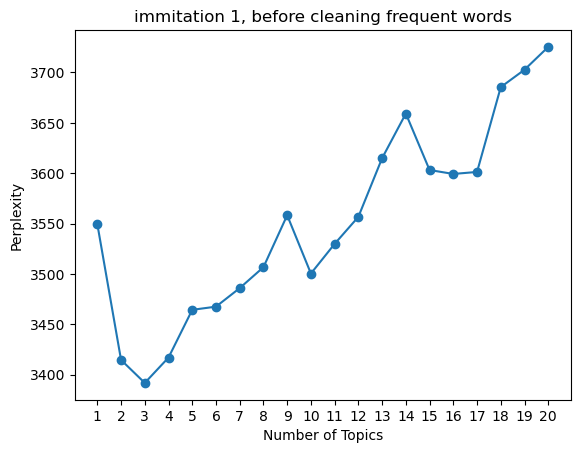

Topic #0: people, like, would, think, one, get, even, someone, right, gt
Repeated Keywords: {'people': 1, 'like': 1, 'would': 1, 'think': 1, 'one': 1, 'get': 1, 'even': 1, 'someone': 1, 'right': 1, 'gt': 1}
Topic #0: people, like, would, think, women, one, even, someone, get, gt
Topic #1: people, like, would, think, get, right, one, even, gt, someone
Repeated Keywords: {'people': 2, 'like': 2, 'would': 2, 'think': 2, 'one': 2, 'even': 2, 'someone': 2, 'get': 2, 'gt': 2, 'women': 1, 'right': 1}
Topic #0: people, like, would, women, think, get, one, someone, even, gt
Topic #1: people, like, would, think, right, get, one, even, someone, gt
Topic #2: people, like, would, think, one, even, white, black, get, gt
Repeated Keywords: {'people': 3, 'like': 3, 'would': 3, 'think': 3, 'get': 3, 'one': 3, 'even': 3, 'gt': 3, 'someone': 2, 'women': 1, 'right': 1, 'white': 1, 'black': 1}
Topic #0: would, people, like, gt, child, get, one, think, even, women
Topic #1: people, like, would, think, someo

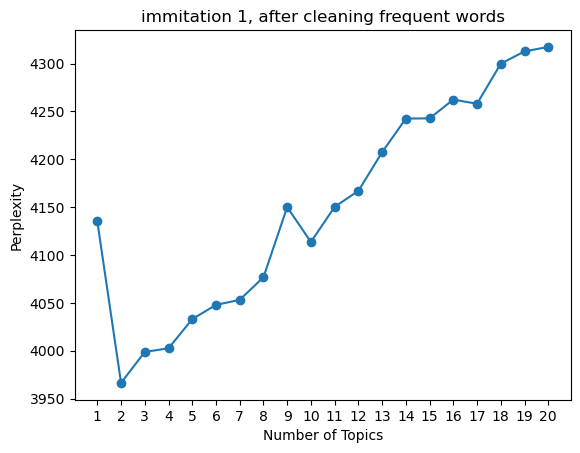

Topic #0: right, mean, saying, make, way, know, say, point, something, could
Repeated Keywords: {'right': 1, 'mean': 1, 'saying': 1, 'make': 1, 'way': 1, 'know': 1, 'say': 1, 'point': 1, 'something': 1, 'could': 1}
Topic #0: women, mean, men, saying, way, make, say, know, gender, right
Topic #1: right, make, mean, saying, way, us, know, say, got, point
Repeated Keywords: {'mean': 2, 'saying': 2, 'way': 2, 'make': 2, 'say': 2, 'know': 2, 'right': 2, 'women': 1, 'men': 1, 'gender': 1, 'us': 1, 'got': 1, 'point': 1}
Topic #0: trans, sexual, sex, still, mean, thing, find, point, make, way
Topic #1: right, mean, make, saying, us, government, way, know, got, ca
Topic #2: women, saying, mean, way, say, make, something, right, men, could
Repeated Keywords: {'mean': 3, 'make': 3, 'way': 3, 'right': 2, 'saying': 2, 'trans': 1, 'sexual': 1, 'sex': 1, 'still': 1, 'thing': 1, 'find': 1, 'point': 1, 'us': 1, 'government': 1, 'know': 1, 'got': 1, 'ca': 1, 'women': 1, 'say': 1, 'something': 1, 'men': 

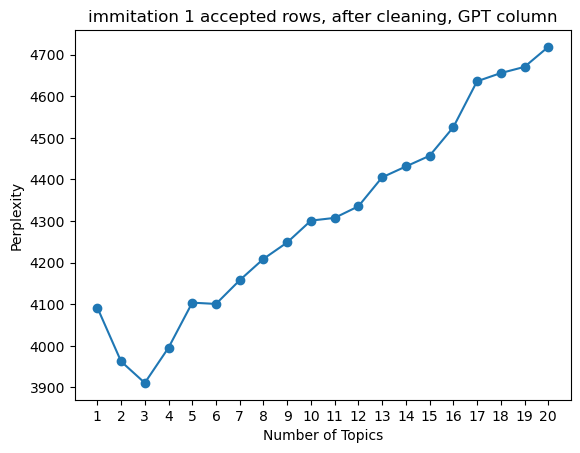

Topic #0: right, mean, saying, way, make, got, know, thing, say, something
Repeated Keywords: {'right': 1, 'mean': 1, 'saying': 1, 'way': 1, 'make': 1, 'got': 1, 'know': 1, 'thing': 1, 'say': 1, 'something': 1}
Topic #0: saying, mean, right, got, way, know, say, thing, make, point
Topic #1: right, make, mean, way, could, saying, something, know, government, got
Repeated Keywords: {'saying': 2, 'mean': 2, 'right': 2, 'got': 2, 'way': 2, 'know': 2, 'make': 2, 'say': 1, 'thing': 1, 'point': 1, 'could': 1, 'something': 1, 'government': 1}
Topic #0: saying, mean, know, way, ca, got, right, say, make, something
Topic #1: gender, make, mean, way, life, saying, women, could, person, right
Topic #2: right, government, got, way, us, mean, make, want, could, thing
Repeated Keywords: {'mean': 3, 'way': 3, 'right': 3, 'make': 3, 'saying': 2, 'got': 2, 'could': 2, 'know': 1, 'ca': 1, 'say': 1, 'something': 1, 'gender': 1, 'life': 1, 'women': 1, 'person': 1, 'government': 1, 'us': 1, 'want': 1, 'thin

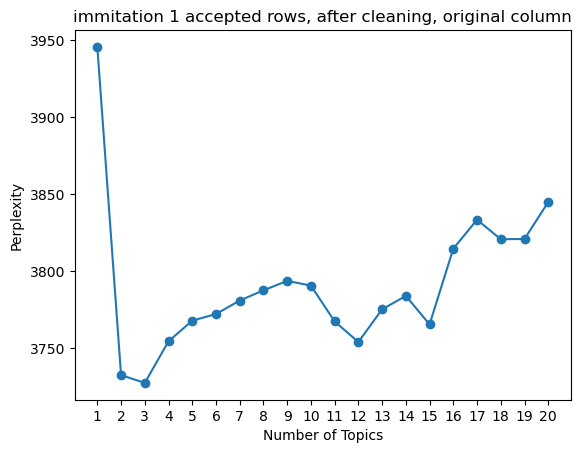

Topic #0: make, point, right, way, say, also, want, could, person, see
Repeated Keywords: {'make': 1, 'point': 1, 'right': 1, 'way': 1, 'say': 1, 'also': 1, 'want': 1, 'could': 1, 'person': 1, 'see': 1}
Topic #0: right, make, government, point, us, way, also, could, say, want
Topic #1: women, men, say, gender, person, point, make, black, white, way
Repeated Keywords: {'make': 2, 'point': 2, 'way': 2, 'say': 2, 'right': 1, 'government': 1, 'us': 1, 'also': 1, 'could': 1, 'want': 1, 'women': 1, 'men': 1, 'gender': 1, 'person': 1, 'black': 1, 'white': 1}
Topic #0: right, government, want, make, way, say, point, us, also, law
Topic #1: point, white, make, said, say, also, way, really, know, want
Topic #2: women, gender, men, person, could, make, way, point, life, woman
Repeated Keywords: {'make': 3, 'way': 3, 'point': 3, 'want': 2, 'say': 2, 'also': 2, 'right': 1, 'government': 1, 'us': 1, 'law': 1, 'white': 1, 'said': 1, 'really': 1, 'know': 1, 'women': 1, 'gender': 1, 'men': 1, 'person':

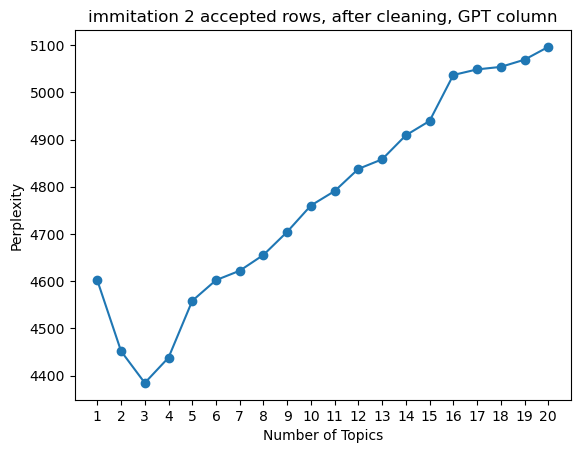

Topic #0: individuals, believe, point, right, might, could, rather, without, make, issue
Repeated Keywords: {'individuals': 1, 'believe': 1, 'point': 1, 'right': 1, 'might': 1, 'could': 1, 'rather': 1, 'without': 1, 'make': 1, 'issue': 1}
Topic #0: right, could, make, government, without, believe, individuals, might, point, life
Topic #1: individuals, believe, point, rather, women, gender, might, issue, without, let
Repeated Keywords: {'without': 2, 'believe': 2, 'individuals': 2, 'might': 2, 'point': 2, 'right': 1, 'could': 1, 'make': 1, 'government': 1, 'life': 1, 'rather': 1, 'women': 1, 'gender': 1, 'issue': 1, 'let': 1}
Topic #0: right, make, could, life, child, believe, without, point, might, government
Topic #1: individuals, women, gender, rather, believe, men, might, point, issue, others
Topic #2: trump, us, believe, could, point, individuals, many, right, might, gun
Repeated Keywords: {'believe': 3, 'point': 3, 'might': 3, 'right': 2, 'could': 2, 'individuals': 2, 'make': 1, '

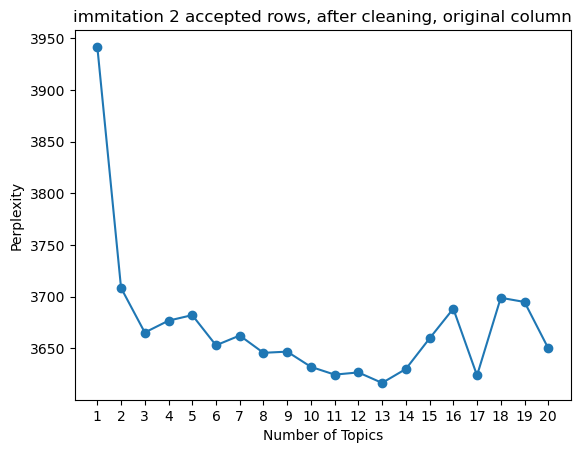

Topic #0: make, right, point, say, way, also, want, could, person, saying
Repeated Keywords: {'make': 1, 'right': 1, 'point': 1, 'say': 1, 'way': 1, 'also': 1, 'want': 1, 'could': 1, 'person': 1, 'saying': 1}
Topic #0: women, say, point, way, person, men, make, saying, something, want
Topic #1: right, government, us, make, also, point, could, want, way, say
Repeated Keywords: {'say': 2, 'point': 2, 'way': 2, 'make': 2, 'want': 2, 'women': 1, 'person': 1, 'men': 1, 'saying': 1, 'something': 1, 'right': 1, 'government': 1, 'us': 1, 'also': 1, 'could': 1}
Topic #0: women, men, person, say, gender, make, point, way, saying, want
Topic #1: right, government, us, law, point, rights, also, free, make, want
Topic #2: make, say, way, said, point, trump, also, something, really, many
Repeated Keywords: {'make': 3, 'point': 3, 'say': 2, 'way': 2, 'want': 2, 'also': 2, 'women': 1, 'men': 1, 'person': 1, 'gender': 1, 'saying': 1, 'right': 1, 'government': 1, 'us': 1, 'law': 1, 'rights': 1, 'free': 

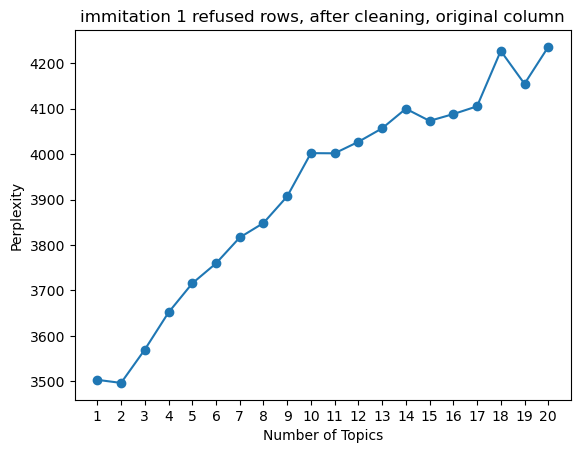

Topic #0: right, women, say, make, want, point, saying, men, also, way
Repeated Keywords: {'right': 1, 'women': 1, 'say': 1, 'make': 1, 'want': 1, 'point': 1, 'saying': 1, 'men': 1, 'also': 1, 'way': 1}
Topic #0: women, men, woman, rape, want, sex, https, say, saying, make
Topic #1: right, make, also, point, say, mean, want, good, something, things
Repeated Keywords: {'want': 2, 'say': 2, 'make': 2, 'women': 1, 'men': 1, 'woman': 1, 'rape': 1, 'sex': 1, 'https': 1, 'saying': 1, 'right': 1, 'also': 1, 'point': 1, 'mean': 1, 'good': 1, 'something': 1, 'things': 1}
Topic #0: women, men, rape, woman, say, right, sex, saying, want, way
Topic #1: right, also, make, point, good, mean, person, know, want, something
Topic #2: trump, say, believe, want, muslims, islam, https, make, point, many
Repeated Keywords: {'want': 3, 'say': 2, 'right': 2, 'make': 2, 'point': 2, 'women': 1, 'men': 1, 'rape': 1, 'woman': 1, 'sex': 1, 'saying': 1, 'way': 1, 'also': 1, 'good': 1, 'mean': 1, 'person': 1, 'know

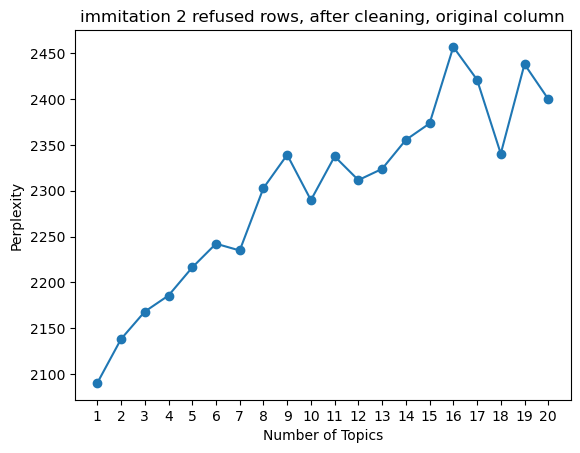

Topic #0: sex, trans, black, want, woman, point, women, make, attracted, sexual
Repeated Keywords: {'sex': 1, 'trans': 1, 'black': 1, 'want': 1, 'woman': 1, 'point': 1, 'women': 1, 'make': 1, 'attracted': 1, 'sexual': 1}
Topic #0: trans, black, attracted, sexual, want, racist, sex, know, point, say
Topic #1: women, woman, make, sex, men, right, could, point, time, want
Repeated Keywords: {'want': 2, 'sex': 2, 'point': 2, 'trans': 1, 'black': 1, 'attracted': 1, 'sexual': 1, 'racist': 1, 'know': 1, 'say': 1, 'women': 1, 'woman': 1, 'make': 1, 'men': 1, 'right': 1, 'could': 1, 'time': 1}
Topic #0: trans, attracted, sexual, want, point, woman, children, sex, say, racist
Topic #1: make, woman, women, sex, believe, go, could, also, small, rape
Topic #2: black, https, actually, happened, person, consent, right, problem, ca, point
Repeated Keywords: {'point': 2, 'woman': 2, 'sex': 2, 'trans': 1, 'attracted': 1, 'sexual': 1, 'want': 1, 'children': 1, 'say': 1, 'racist': 1, 'make': 1, 'women': 1

In [7]:
vas('LDA_results_imms_text.pkl', title='original text,before cleaning frequent words')
vas('LDA_results_imms_text_1.pkl', title='original text,after cleaning frequent words')

vas('LDA_results_imms_imm.pkl', title='immitation 1, before cleaning frequent words')
vas('LDA_results_imms_imm_1.pkl', title='immitation 1, after cleaning frequent words')
# 
# vas('LDA_results_imms.pkl')
# vas('LDA_results_imms_1.pkl')

vas('LDA_results_imms_imm_1_single.pkl', title='immitation 1 accepted rows, after cleaning, GPT column')
vas('LDA_results_imms_imm_1_single_com', title = 'immitation 1 accepted rows, after cleaning, original column')
vas('LDA_results_imms_1_single.pkl', title='immitation 2 accepted rows, after cleaning, GPT column')
vas('LDA_results_imms_1_single_com', title = 'immitation 2 accepted rows, after cleaning, original column')
#only false rows
vas('LDA_results_imms_imm_1_single_com_reversed', title='immitation 1 refused rows, after cleaning, original column')
vas('LDA_results_imms_1_single_com_reversed', title='immitation 2 refused rows, after cleaning, original column')

In [8]:
def merge_dictionaries(dict1, dict2):
    merged_dict = dict1.copy()
    for key, value in dict2.items():
        if key in merged_dict:
            merged_dict[key] += value
        else:
            merged_dict[key] = value
    return merged_dict

In [9]:
# take the repeated keywords of the refused-to-immitate data. consider both the lowest perplexity and the most repeated keywords at n_topic = 20
#imm_com_reverse
a= {'want': 2, 'say': 2, 'make': 2, 'women': 1, 'men': 1, 'woman': 1, 'rape': 1, 'sex': 1, 'https': 1, 'saying': 1, 'right': 1, 'also': 1, 'point': 1, 'mean': 1, 'good': 1, 'something': 1, 'things': 1}
b= {'right': 6, 'white': 5, 'women': 4, 'men': 4, 'person': 4, 'https': 4, 'black': 4, 'want': 4, 'said': 4, 'saying': 4, 'say': 4, 'woman': 3, 'problem': 3, 'going': 3, 'rape': 3, 'sex': 3, 'also': 3, 'child': 3, 'make': 3, 'something': 3, 'could': 3, 'way': 3, 'still': 2, 'muslims': 2, 'guns': 2, 'idea': 2, 'trump': 2, 'media': 2, 'news': 2, 'laws': 2, 'wrong': 2, 'society': 2, 'point': 2, 'racist': 2, 'man': 1, 'without': 1, 'body': 1, 'police': 1, 'real': 1, 'thing': 1, 'month': 1, 'free': 1, 'student': 1, 'better': 1, 'war': 1, 'back': 1, 'kavanaugh': 1, 'left': 1, 'vote': 1, 'death': 1, 'western': 1, 'garland': 1, 'thought': 1, 'years': 1, 'small': 1, 'discrimination': 1, 'jewish': 1, 'well': 1, 'islam': 1, 'good': 1, 'world': 1, 'believe': 1, 'religion': 1, 'bad': 1, 'tax': 1, 'never': 1, 'rights': 1, 'ban': 1, 'puberty': 1, 'things': 1, 'williams': 1, 'http': 1, 'everyone': 1, 'examples': 1, 'dog': 1, 'gift': 1, 'fact': 1, 'american': 1, 'stores': 1, 'hotels': 1, 'offended': 1, 'liberals': 1, 'amp': 1, 'lives': 1, 'change': 1, 'trace': 1, 'resources': 1, 'judge': 1, 'evidence': 1, 'religious': 1, 'hard': 1, 'millions': 1, 'know': 1, 'much': 1, 'ca': 1, 'race': 1, 'polls': 1, 'law': 1, 'polling': 1, 'based': 1, 'sexual': 1, 'find': 1, 'children': 1, 'urges': 1, 'control': 1, 'matter': 1, 'suffering': 1, 'nature': 1, 'eat': 1, 'information': 1, 'human': 1, 'gay': 1, 'look': 1, 'privilege': 1, 'nazi': 1, 'help': 1, 'call': 1, 'parents': 1, 'nazis': 1, 'argument': 1, 'government': 1, 'understand': 1, 'racism': 1, 'capitalism': 1, 'different': 1, 'mean': 1, 'vegans': 1, 'many': 1, 'actually': 1, 'food': 1}
imm_com_reverse_wc = merge_dictionaries(a,b)
#imm_1_com_reverse
#lowest_per: ['sex':1, 'trans':1, 'black':1, 'want':1, 'woman':1, 'point':1, 'women':1, 'make':1, 'attracted':1, 'sexual':1]
a= {'sex': 1, 'trans': 1, 'black': 1, 'want': 1, 'woman': 1, 'point': 1, 'women': 1, 'make': 1, 'attracted': 1, 'sexual': 1}
b= {'black': 6, 'sexual': 4, 'sex': 3, 'woman': 3, 'right': 3, 'trans': 3, 'point': 3, 'women': 3, 'saying': 3, 'person': 3, 'rape': 3, 'make': 3, 'also': 2, 'white': 2, 'stop': 2, 'know': 2, 'matter': 2, 'children': 2, 'happened': 2, 'men': 2, 'child': 2, 'racist': 2, 'better': 2, 'consent': 2, 'say': 2, 'want': 2, 'see': 2, 'go': 2, 'without': 2, 'ca': 2, 'pedophile': 2, 'pedophiles': 2, 'date': 2, 'gay': 2, 'risk': 2, 'racism': 1, 'understand': 1, 'zimbabwe': 1, 'good': 1, 'trying': 1, 'cmv': 1, 'religion': 1, 'grooming': 1, 'pretty': 1, 'different': 1, 'harmful': 1, 'https': 1, 'police': 1, 'guy': 1, 'maybe': 1, 'actually': 1, 'gun': 1, 'serial': 1, 'porn': 1, 'foreskin': 1, 'find': 1, 'completely': 1, 'minority': 1, 'look': 1, 'man': 1, 'time': 1, 'father': 1, 'fair': 1, 'abortion': 1, 'wrestle': 1, 'countries': 1, 'student': 1, 'slavery': 1, 'conservative': 1, 'rumors': 1, 'small': 1, 'sign': 1, 'discrimination': 1, 'penises': 1, 'etc': 1, 'dick': 1, 'dont': 1, 'world': 1, 'way': 1, 'whole': 1, 'twice': 1, 'zionists': 1, 'cure': 1, 'well': 1, 'freedom': 1, 'problem': 1, 'free': 1, 'could': 1, 'government': 1, 'sexually': 1, 'sexist': 1, 'age': 1, 'gays': 1, 'contact': 1, 'fucked': 1, 'preference': 1, 'true': 1, 'attracted': 1, 'naturally': 1, 'wrong': 1, 'society': 1, 'start': 1, 'school': 1, 'simply': 1, 'everyone': 1, 'groups': 1, 'always': 1, 'muslims': 1, 'bad': 1, 'reason': 1, 'used': 1, 'argument': 1, 'puberty': 1, 'blockers': 1, 'value': 1, 'term': 1, 'seems': 1, 'long': 1, 'might': 1, 'source': 1, 'yes': 1, 'http': 1, 'laws': 1, 'op': 1, 'answer': 1, 'us': 1, 'anti': 1, 'kill': 1, 'chance': 1, 'access': 1, 'heard': 1, 'getting': 1, 'ever': 1, 'higher': 1, 'possible': 1, 'public': 1, 'hard': 1, 'urges': 1, 'going': 1, 'social': 1, 'place': 1, 'nigger': 1, 'something': 1, 'nothing': 1, 'stupid': 1, 'shooter': 1, 'issue': 1, 'call': 1, 'allowed': 1}
imm_1_com_reverse_wc = merge_dictionaries(a,b)

#imm_com   when not refuse to immitate, original text
a = {'make': 3, 'way': 3, 'point': 3, 'want': 2, 'say': 2, 'also': 2, 'right': 1, 'government': 1, 'us': 1, 'law': 1, 'white': 1, 'said': 1, 'really': 1, 'know': 1, 'women': 1, 'gender': 1, 'men': 1, 'person': 1, 'could': 1, 'life': 1, 'woman': 1}
b = {'make': 9, 'point': 7, 'also': 6, 'person': 5, 'want': 4, 'way': 4, 'gender': 4, 'black': 4, 'right': 3, 'free': 3, 'say': 3, 'us': 3, 'white': 3, 'better': 3, 'many': 3, 'could': 3, 'much': 3, 'know': 3, 'race': 3, 'woman': 3, 'men': 3, 'women': 3, 'government': 2, 'eat': 2, 'meat': 2, 'still': 2, 'trump': 2, 'dog': 2, 'said': 2, 'speech': 2, 'child': 2, 'really': 2, 'something': 2, 'man': 2, 'news': 2, 'different': 2, 'see': 2, 'rights': 1, 'law': 1, 'film': 1, 'rules': 1, 'western': 1, 'countries': 1, 'everyone': 1, 'animals': 1, 'life': 1, 'market': 1, 'system': 1, 'capitalism': 1, 'obama': 1, 'israel': 1, 'pit': 1, 'wolf': 1, 'pits': 1, 'bad': 1, 'international': 1, 'theft': 1, 'islam': 1, 'polls': 1, 'saying': 1, 'racism': 1, 'ca': 1, 'saudi': 1, 'christian': 1, 'grooming': 1, 'poor': 1, 'find': 1, 'cabinet': 1, 'action': 1, 'food': 1, 'vegan': 1, 'father': 1, 'anything': 1, 'evidence': 1, 'gun': 1, 'guns': 1, 'crime': 1, 'consent': 1, 'game': 1, 'games': 1, 'okay': 1, 'good': 1, 'decision': 1, 'choice': 1, 'time': 1, 'choices': 1, 'determinism': 1, 'school': 1, 'information': 1, 'argument': 1, 'source': 1, 'vaccines': 1, 'whether': 1, 'body': 1, 'harassment': 1, 'culture': 1, 'trust': 1, 'movies': 1, 'thing': 1, 'fact': 1, 'terrorism': 1, 'alcohol': 1, 'effects': 1, 'drug': 1, 'negative': 1, 'mass': 1, 'brain': 1, 'media': 1, 'things': 1, 'harm': 1, 'privilege': 1, 'male': 1, 'vegans': 1, 'exists': 1, 'paid': 1, 'children': 1, 'abuse': 1, 'masculinity': 1, 'term': 1, 'female': 1, 'every': 1, 'wrong': 1}
imm_com_wc = merge_dictionaries(a,b)

#imm_1_com
a = {'right': 5, 'also': 5, 'make': 5, 'say': 5, 'point': 4, 'want': 3, 'women': 2, 'person': 2, 'said': 2, 'really': 2, 'us': 2, 'could': 2, 'better': 2, 'woman': 2, 'black': 2, 'many': 2, 'white': 2, 'way': 2, 'speech': 2, 'income': 2, 'still': 2, 'child': 1, 'sex': 1, 'children': 1, 'life': 1, 'parents': 1, 'birth': 1, 'abortion': 1, 'government': 1, 'capitalism': 1, 'dog': 1, 'polls': 1, 'rights': 1, 'law': 1, 'amendment': 1, 'constitution': 1, 'something': 1, 'gun': 1, 'without': 1, 'good': 1, 'much': 1, 'going': 1, 'men': 1, 'gender': 1, 'male': 1, 'female': 1, 'sexual': 1, 'trump': 1, 'media': 1, 'news': 1, 'things': 1, 'change': 1, 'political': 1, 'bad': 1, 'understand': 1, 'film': 1, 'countries': 1, 'consent': 1, 'racism': 1, 'race': 1, 'game': 1, 'terrorism': 1, 'privilege': 1, 'poor': 1, 'color': 1, 'police': 1, 'free': 1, 'saying': 1, 'amp': 1, 'https': 1, 'tax': 1, 'different': 1, 'impediment': 1, 'time': 1, 'work': 1, 'crime': 1, 'nuclear': 1, 'guns': 1, 'number': 1, 'eat': 1, 'meat': 1, 'vegan': 1, 'animals': 1, 'eating': 1, 'food': 1, 'animal': 1, 'suffering': 1, 'man': 1, 'information': 1, 'help': 1, 'question': 1, 'effects': 1, 'obligation': 1, 'alcohol': 1}
b={'way': 6, 'make': 6, 'point': 6, 'say': 5, 'women': 4, 'law': 4, 'also': 4, 'black': 4, 'could': 3, 'want': 3, 'government': 3, 'work': 3, 'us': 3, 'men': 3, 'person': 3, 'right': 3, 'child': 2, 'saying': 2, 'said': 2, 'system': 2, 'race': 2, 'woman': 2, 'things': 2, 'political': 2, 'many': 2, 'white': 2, 'speech': 2, 'animals': 2, 'argument': 2, 'much': 2, 'still': 2, 'birth': 1, 'sex': 1, 'control': 1, 'side': 1, 'israel': 1, 'polls': 1, 'capitalism': 1, 'saudi': 1, 'election': 1, 'polling': 1, 'business': 1, 'circumcision': 1, 'something': 1, 'without': 1, 'definition': 1, 'ca': 1, 'true': 1, 'harm': 1, 'nazi': 1, 'power': 1, 'gender': 1, 'racist': 1, 'trump': 1, 'media': 1, 'news': 1, 'change': 1, 'bad': 1, 'consent': 1, 'film': 1, 'countries': 1, 'understand': 1, 'western': 1, 'racism': 1, 'terrorism': 1, 'president': 1, 'order': 1, 'donating': 1, 'representation': 1, 'penny': 1, 'attack': 1, 'free': 1, 'https': 1, 'amp': 1, 'impediment': 1, 'oliver': 1, 'might': 1, 'examples': 1, 'variation': 1, 'different': 1, 'guns': 1, 'income': 1, 'money': 1, 'tax': 1, 'jobs': 1, 'country': 1, 'taxes': 1, 'wild': 1, 'less': 1, 'japanese': 1, 'okay': 1, 'op': 1, 'asian': 1, 'chinese': 1, 'information': 1, 'obligation': 1, 'help': 1, 'effects': 1, 'alcohol': 1, 'rules': 1, 'mean': 1, 'religious': 1, 'social': 1, 'good': 1, 'employees': 1, 'life': 1, 'man': 1, 'time': 1, 'rights': 1, 'game': 1, 'games': 1, 'wrong': 1, 'legal': 1, 'dog': 1, 'kavanaugh': 1, 'believe': 1, 'evidence': 1, 'dogs': 1, 'states': 1, 'pit': 1, 'republicans': 1, 'crime': 1, 'really': 1, 'meat': 1, 'eat': 1, 'vegan': 1, 'eating': 1, 'food': 1, 'vegans': 1, 'animal': 1, 'suffering': 1, 'veganism': 1, 'issues': 1, 'terrorist': 1, 'attacks': 1, 'kids': 1, 'privilege': 1, 'movies': 1}
imm_1_com_wc = merge_dictionaries(a,b)


In [10]:
print(imm_1_com_reverse_wc)
print(imm_1_com_wc)
print(imm_com_reverse_wc)
print(imm_com_wc)

{'sex': 4, 'trans': 4, 'black': 7, 'want': 3, 'woman': 4, 'point': 4, 'women': 4, 'make': 4, 'attracted': 2, 'sexual': 5, 'right': 3, 'saying': 3, 'person': 3, 'rape': 3, 'also': 2, 'white': 2, 'stop': 2, 'know': 2, 'matter': 2, 'children': 2, 'happened': 2, 'men': 2, 'child': 2, 'racist': 2, 'better': 2, 'consent': 2, 'say': 2, 'see': 2, 'go': 2, 'without': 2, 'ca': 2, 'pedophile': 2, 'pedophiles': 2, 'date': 2, 'gay': 2, 'risk': 2, 'racism': 1, 'understand': 1, 'zimbabwe': 1, 'good': 1, 'trying': 1, 'cmv': 1, 'religion': 1, 'grooming': 1, 'pretty': 1, 'different': 1, 'harmful': 1, 'https': 1, 'police': 1, 'guy': 1, 'maybe': 1, 'actually': 1, 'gun': 1, 'serial': 1, 'porn': 1, 'foreskin': 1, 'find': 1, 'completely': 1, 'minority': 1, 'look': 1, 'man': 1, 'time': 1, 'father': 1, 'fair': 1, 'abortion': 1, 'wrestle': 1, 'countries': 1, 'student': 1, 'slavery': 1, 'conservative': 1, 'rumors': 1, 'small': 1, 'sign': 1, 'discrimination': 1, 'penises': 1, 'etc': 1, 'dick': 1, 'dont': 1, 'worl

In [11]:
import numpy as np
from scipy.spatial.distance import cosine
from sklearn.metrics import jaccard_score

# 示例词频字典
dict1 = {'apple': 3, 'banana': 2, 'cherry': 1}
dict2 = {'banana': 2, 'cherry': 2, 'date': 1}

def cosine_similarity(dict1, dict2):
    all_words = set(dict1.keys()).union(set(dict2.keys()))
    vec1 = np.array([dict1.get(word, 0) for word in all_words])
    vec2 = np.array([dict2.get(word, 0) for word in all_words])
    return 1 - cosine(vec1, vec2)

def jaccard_similarity(dict1, dict2):
    all_words = set(dict1.keys()).union(set(dict2.keys()))
    bin_vec1 = np.array([1 if word in dict1 else 0 for word in all_words])
    bin_vec2 = np.array([1 if word in dict2 else 0 for word in all_words])
    return jaccard_score(bin_vec1, bin_vec2)

def calculate_contributions(dict1, dict2, similarity_func):
    # 计算初始相似度
    original_similarity = similarity_func(dict1, dict2)
    
    # 存储贡献度的词
    contributions = []
    
    all_words = set(dict1.keys()).union(set(dict2.keys()))
    
    for word in all_words:
        temp_dict1 = dict1.copy()
        temp_dict2 = dict2.copy()
        
        # 删除当前词
        temp_dict1.pop(word, None)
        temp_dict2.pop(word, None)
        
        # 计算新的相似度
        new_similarity = similarity_func(temp_dict1, temp_dict2)
        
        # 计算相似度变化
        contribution = original_similarity - new_similarity
        
        # 添加到贡献度列表
        contributions.append((word, contribution))
    
    # 按贡献度降序排列
    contributions.sort(key=lambda x: x[1], reverse=True)
    
    return contributions

# 计算余弦相似度的贡献
cosine_contributions = calculate_contributions(dict1, dict2, cosine_similarity)
print("Cosine Similarity Contributions (word, contribution):")
for word, contribution in cosine_contributions:
    print(f"{word}: {contribution}")

# 计算杰卡德相似度的贡献
jaccard_contributions = calculate_contributions(dict1, dict2, jaccard_similarity)
print("\nJaccard Similarity Contributions (word, contribution):")
for word, contribution in jaccard_contributions:
    print(f"{word}: {contribution}")


Cosine Similarity Contributions (word, contribution):
banana: 0.2516797713502298
cherry: 0.038383545468014924
date: -0.03242422568899206
apple: -0.35990470717506706

Jaccard Similarity Contributions (word, contribution):
cherry: 0.16666666666666669
banana: 0.16666666666666669
date: -0.16666666666666663
apple: -0.16666666666666663


In [12]:
cosine_contributions = calculate_contributions(imm_1_com_reverse_wc, imm_1_com_wc, cosine_similarity)
print("Cosine Similarity Contributions (word, contribution):")
for word, contribution in cosine_contributions:
    print(f"{word}: {contribution}")

# 计算杰卡德相似度的贡献
jaccard_contributions = calculate_contributions(imm_1_com_reverse_wc, imm_1_com_wc, jaccard_similarity)
print("\nJaccard Similarity Contributions (word, contribution):")
for word, contribution in jaccard_contributions:
    print(f"{word}: {contribution}")

cosine_contributions_imm = calculate_contributions(imm_com_reverse_wc, imm_com_wc, cosine_similarity)
print("Cosine Similarity Contributions (word, contribution):")
for word, contribution in cosine_contributions:
    print(f"{word}: {contribution}")

# 计算杰卡德相似度的贡献
jaccard_contributions_imm = calculate_contributions(imm_com_reverse_wc, imm_com_wc, jaccard_similarity)
print("\nJaccard Similarity Contributions (word, contribution):")
for word, contribution in jaccard_contributions:
    print(f"{word}: {contribution}")

Cosine Similarity Contributions (word, contribution):
make: 0.026970339232545326
point: 0.025694175444960665
black: 0.02106846026439768
women: 0.01621734560541832
right: 0.014568210652108227
want: 0.012018466265046435
person: 0.010101880085377823
woman: 0.009007849625415676
men: 0.005266591932604148
white: 0.005266591932604148
also: 0.005254901727561934
saying: 0.005019982631298103
child: 0.0039521867873214545
say: 0.0038302584034789477
consent: 0.0022164703171080324
better: 0.0022164703171080324
without: 0.0022164703171080324
government: 0.0015315298715773418
time: 0.0013056589534918839
racism: 0.0013056589534918839
good: 0.0013056589534918839
countries: 0.0013056589534918839
bad: 0.0013056589534918839
different: 0.0013056589534918839
https: 0.0013056589534918839
argument: 0.0013056589534918839
man: 0.0013056589534918839
something: 0.0013056589534918839
free: 0.0013056589534918839
understand: 0.0013056589534918839
could: 0.000991534250894155
us: 0.000991534250894155
abortion: 0.000551

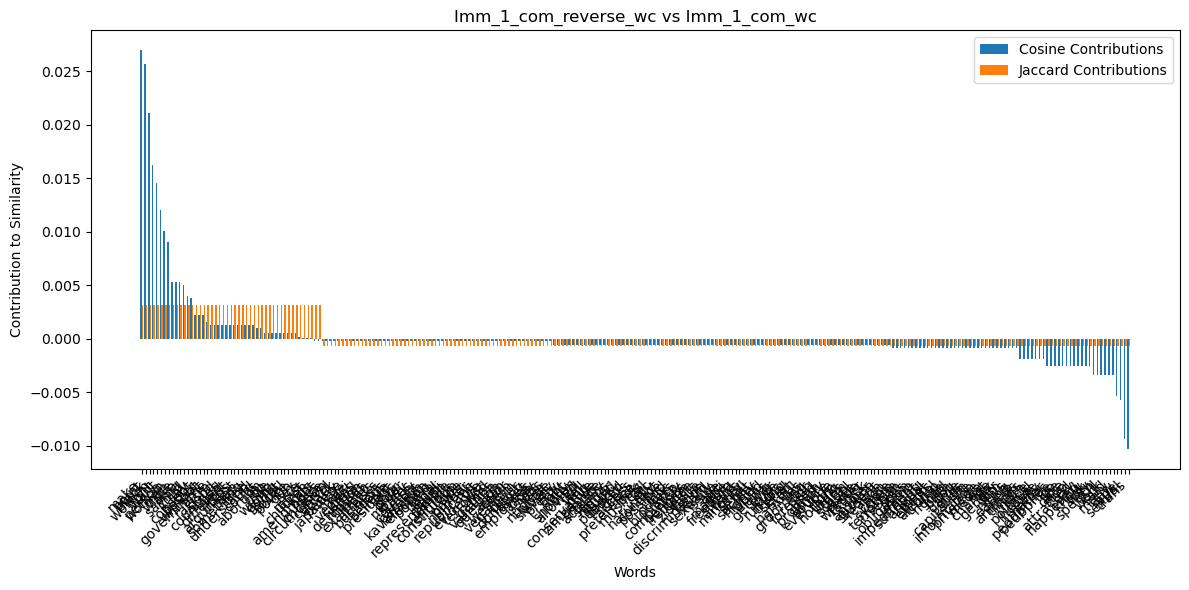

In [13]:
# plot it
import matplotlib.pyplot as plt

def plot_contributions(title, cosine_contributions, jaccard_contributions):
    # 提取单词和贡献值
    words_cosine, contributions_cosine = zip(*cosine_contributions)
    words_jaccard, contributions_jaccard = zip(*jaccard_contributions)
    
    # 设置图表
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # 设置x轴位置
    x_cosine = np.arange(len(words_cosine))
    x_jaccard = x_cosine + 0.4
    
    # 绘制柱状图
    ax.bar(x_cosine, contributions_cosine, width=0.4, label='Cosine Contributions', align='center')
    ax.bar(x_jaccard, contributions_jaccard, width=0.4, label='Jaccard Contributions', align='center')
    
    # 设置x轴标签
    ax.set_xticks(x_cosine + 0.2)
    ax.set_xticklabels(words_cosine, rotation=45, ha='right')
    
    # 添加图表标题和标签
    ax.set_title(title)
    ax.set_xlabel('Words')
    ax.set_ylabel('Contribution to Similarity')
    ax.legend()
    
    # 显示图表
    plt.tight_layout()
    plt.show()
plot_contributions('Imm_1_com_reverse_wc vs Imm_1_com_wc', cosine_contributions, jaccard_contributions)

In [14]:
import altair as alt
import pandas as pd

def plot_bottom_contributions(contributions, title="Bottom 15 Contributions"):
    # 提取最后10个单词和贡献值
    bottom_contributions = contributions[-15:]
    
    # 创建DataFrame
    df = pd.DataFrame(bottom_contributions, columns=['word', 'contribution'])
    
    # 创建柱状图
    chart = alt.Chart(df).mark_bar().encode(
        x=alt.X('word', sort=None, title='Words'),
        y=alt.Y('contribution', title='Contribution to Similarity'),
        tooltip=['word', 'contribution']
    ).properties(
        title=title,
        width=600,
        height=400
    ).configure_axis(
        labelAngle=-45
    )
    
    return chart

# 调用函数并展示图表


In [46]:
plot_bottom_contributions(cosine_contributions).show()
plot_bottom_contributions(jaccard_contributions).show()
plot_bottom_contributions(cosine_contributions_imm).show()
plot_bottom_contributions(jaccard_contributions_imm).show()

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(contributions, title="Word Cloud of Contributions"):
    # 创建词频字典
    bottom_contributions = contributions[-15:]

    word_freq = {word: abs(contribution) for word, contribution in bottom_contributions}
    
    # 创建词云对象
    wordcloud = WordCloud(
        width=800, 
        height=600,
        background_color='white',
        colormap='viridis',
        scale=1,
        normalize_plurals=False
    ).generate_from_frequencies(word_freq)
    
    # 显示词云
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()
    

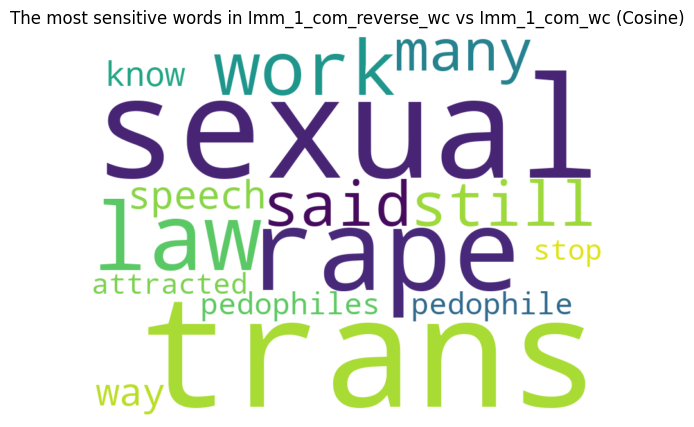

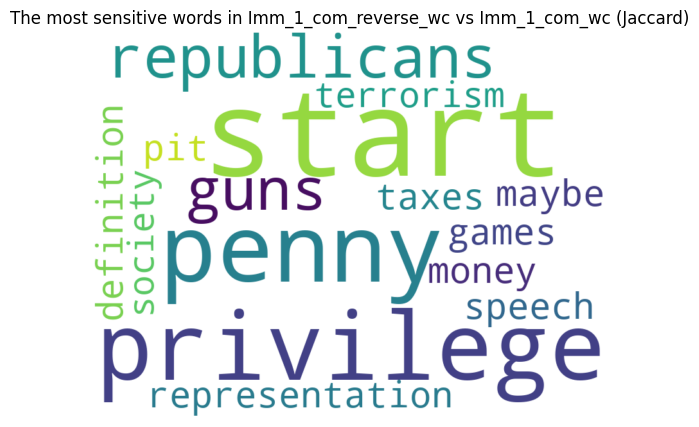

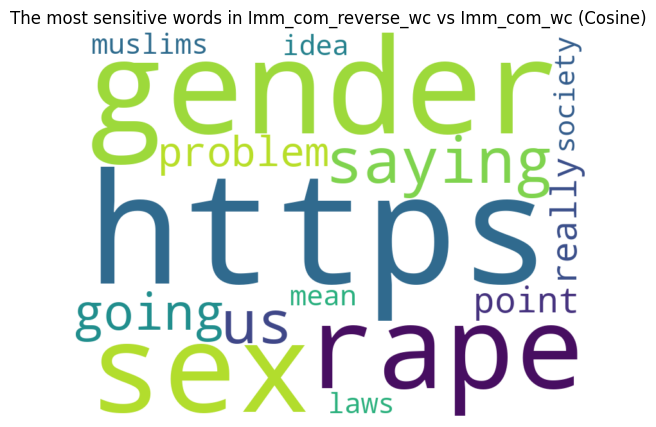

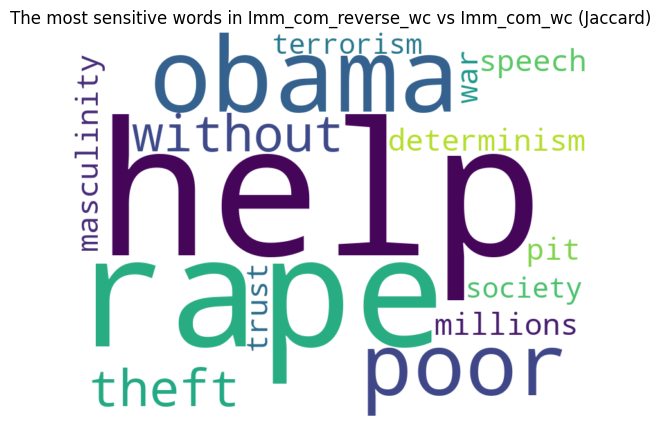

In [41]:
plot_wordcloud(cosine_contributions, title="The most sensitive words in Imm_1_com_reverse_wc vs Imm_1_com_wc (Cosine)")
plot_wordcloud(jaccard_contributions, title="The most sensitive words in Imm_1_com_reverse_wc vs Imm_1_com_wc (Jaccard)")
plot_wordcloud(cosine_contributions_imm, title="The most sensitive words in Imm_com_reverse_wc vs Imm_com_wc (Cosine)")
plot_wordcloud(jaccard_contributions_imm, title="The most sensitive words in Imm_com_reverse_wc vs Imm_com_wc (Jaccard)")

In [17]:
def get_top_k_negative_values_from_list(input_list, k):
    # Sort the list of tuples by the second item (value) in ascending order
    sorted_items = sorted(input_list, key=lambda item: item[1])
    
    # Get the k-th most negative value
    if k > 0 and k <= len(sorted_items):
        threshold_value = sorted_items[k-1][1]
    else:
        return []
    
    # Create a new list with tuples that have values <= threshold_value
    result_list = [item for item in input_list if item[1] <= threshold_value]
    
    return result_list

print(get_top_k_negative_values_from_list(cosine_contributions, 15))

[('matter', -0.0025182915432514497), ('pedophiles', -0.0025182915432514497), ('pedophile', -0.0025182915432514497), ('go', -0.0025182915432514497), ('see', -0.0025182915432514497), ('date', -0.0025182915432514497), ('stop', -0.0025182915432514497), ('attracted', -0.0025182915432514497), ('gay', -0.0025182915432514497), ('happened', -0.0025182915432514497), ('know', -0.0025182915432514497), ('risk', -0.0025182915432514497), ('way', -0.0033866453075442893), ('speech', -0.0034374231230226426), ('still', -0.0034374231230226426), ('work', -0.0034374231230226426), ('said', -0.0034374231230226426), ('many', -0.0034374231230226426), ('law', -0.005400890681569792), ('rape', -0.005717708777370212), ('sexual', -0.00941588666082982), ('trans', -0.010296289434116201)]


In [18]:
sensitive_dict_imm_1= dict(get_top_k_negative_values_from_list(cosine_contributions, 15))
print(sensitive_dict_imm_1)
sensitive_dict_imm_1_Jaccard = dict(get_top_k_negative_values_from_list(jaccard_contributions, 10))
print(sensitive_dict_imm_1_Jaccard)

{'matter': -0.0025182915432514497, 'pedophiles': -0.0025182915432514497, 'pedophile': -0.0025182915432514497, 'go': -0.0025182915432514497, 'see': -0.0025182915432514497, 'date': -0.0025182915432514497, 'stop': -0.0025182915432514497, 'attracted': -0.0025182915432514497, 'gay': -0.0025182915432514497, 'happened': -0.0025182915432514497, 'know': -0.0025182915432514497, 'risk': -0.0025182915432514497, 'way': -0.0033866453075442893, 'speech': -0.0034374231230226426, 'still': -0.0034374231230226426, 'work': -0.0034374231230226426, 'said': -0.0034374231230226426, 'many': -0.0034374231230226426, 'law': -0.005400890681569792, 'rape': -0.005717708777370212, 'sexual': -0.00941588666082982, 'trans': -0.010296289434116201}
{'crime': -0.0007143725680933966, 'kids': -0.0007143725680933966, 'whole': -0.0007143725680933966, 'amendment': -0.0007143725680933966, 'system': -0.0007143725680933966, 'matter': -0.0007143725680933966, 'slavery': -0.0007143725680933966, 'terrorism': -0.0007143725680933966, 'p

In [19]:
def reassign_negative_values(input_dict):
    # Extract negative values and sort them by closeness to zero (ascending order)
    negative_items = [(key, value) for key, value in input_dict.items() if value < 0]
    sorted_negatives = sorted(set(value for _, value in negative_items), key=abs)
    
    # Create a mapping from original negative values to new assigned values
    value_mapping = {value: -(i + 1) for i, value in enumerate(sorted_negatives)}
    
    # Reassign values in the dictionary
    reassigned_dict = input_dict.copy()
    for key, value in input_dict.items():
        if value < 0:
            reassigned_dict[key] = value_mapping[value]
    
    return reassigned_dict

reassigned_dict_imm_1 = reassign_negative_values(sensitive_dict_imm_1)
print(reassigned_dict_imm_1)

{'matter': -1, 'pedophiles': -1, 'pedophile': -1, 'go': -1, 'see': -1, 'date': -1, 'stop': -1, 'attracted': -1, 'gay': -1, 'happened': -1, 'know': -1, 'risk': -1, 'way': -2, 'speech': -3, 'still': -3, 'work': -3, 'said': -3, 'many': -3, 'law': -4, 'rape': -5, 'sexual': -6, 'trans': -7}


In [57]:
reassigned_dict_imm_1_Jaccard = reassign_negative_values(sensitive_dict_imm_1_Jaccard)
print(reassigned_dict_imm_1_Jaccard)

{'control': -1, 'heard': -1, 'conservative': -1, 'circumcision': -1, 'call': -1, 'whole': -1, 'crime': -1, 'birth': -1, 'twice': -1, 'western': -1, 'stupid': -1, 'work': -1, 'freedom': -1, 'school': -1, 'discrimination': -1, 'http': -1, 'dont': -1, 'matter': -1, 'go': -1, 'fair': -1, 'ever': -1, 'polls': -1, 'much': -1, 'political': -1, 'father': -1, 'change': -1, 'answer': -1, 'nuclear': -1, 'student': -1, 'fucked': -1, 'world': -1, 'urges': -1, 'life': -1, 'hard': -1, 'donating': -1, 'sexist': -1, 'kill': -1, 'president': -1, 'source': -1, 'naturally': -1, 'believe': -1, 'see': -1, 'term': -1, 'capitalism': -1, 'power': -1, 'long': -1, 'religious': -1, 'obligation': -1, 'rules': -1, 'jobs': -1, 'trans': -1, 'religion': -1, 'gender': -1, 'cure': -1, 'suffering': -1, 'things': -1, 'race': -1, 'effects': -1, 'penises': -1, 'vegan': -1, 'seems': -1, 'harm': -1, 'shooter': -1, 'examples': -1, 'chinese': -1, 'legal': -1, 'issues': -1, 'number': -1, 'rumors': -1, 'impediment': -1, 'risk': -

In [20]:
sensitive_dict_imm_1_weighted = reassign_negative_values(dict(get_top_k_negative_values_from_list(cosine_contributions, 15)))
print(sensitive_dict_imm_1_weighted)
sensitive_dict_imm_weighted = reassign_negative_values(dict(get_top_k_negative_values_from_list(cosine_contributions_imm, 15)))
print(sensitive_dict_imm_weighted)

{'matter': -1, 'pedophiles': -1, 'pedophile': -1, 'go': -1, 'see': -1, 'date': -1, 'stop': -1, 'attracted': -1, 'gay': -1, 'happened': -1, 'know': -1, 'risk': -1, 'way': -2, 'speech': -3, 'still': -3, 'work': -3, 'said': -3, 'many': -3, 'law': -4, 'rape': -5, 'sexual': -6, 'trans': -7}
{'mean': -1, 'muslims': -1, 'idea': -1, 'racist': -1, 'society': -1, 'laws': -1, 'really': -2, 'point': -3, 'going': -4, 'problem': -4, 'us': -5, 'saying': -6, 'rape': -7, 'sex': -7, 'gender': -8, 'https': -9}


In [18]:
def get_top_models(results_list, n=3):
    sorted_results = sorted(results_list, key=lambda x: x['perplexity'])
    return sorted_results[:n]

# merge their word bag for frequent words according to result['repeated_keywords'] = sorted_repeated_keywords this dictionary
def merge_top_models_return_frequent_words(results_list):
    dict = {}
    for model in results_list:
        for k,v in model['repeated_keywords'].items():
            if k in dict:
                dict[k] += v
            else:
                dict[k] = v
                
    return dict

top_models_imm_1 = get_top_models(results_list_imm_1)
top_models_imm = get_top_models(results_list_imm)
top_models_ori = get_top_models(results_list_ori)

frequent_words_imm_1 = merge_top_models_return_frequent_words(top_models_imm_1)
frequent_words_imm = merge_top_models_return_frequent_words(top_models_imm)
frequent_words_ori = merge_top_models_return_frequent_words(top_models_ori)

print(frequent_words_imm_1)
print(frequent_words_imm)
print(frequent_words_ori)



{'would': 9, 'people': 9, 'like': 9, 'one': 9, 'think': 9, 'someone': 4, 'individuals': 2, 'believe': 4, 'even': 5, 'however': 4}
{'people': 9, 'like': 9, 'would': 9, 'think': 9, 'get': 8, 'one': 9, 'even': 8, 'gt': 7, 'someone': 6, 'women': 2, 'right': 2}
{'gt': 35, 'would': 37, 'people': 34, 'like': 34, 'think': 24, 'one': 25, 'make': 9, 'right': 5, 'even': 5, 'trump': 4, 'get': 6, 'free': 4, 'government': 5, 'law': 4, 'want': 2, 'child': 4, 'us': 4, 'person': 2, 'say': 2, 'point': 2, 'women': 4, 'men': 2, 'gender': 2, 'speech': 2, 'could': 2, 'system': 2}


In [ ]:
# we have differnt themes, then we let GPT judge whether a theme is dangerous/sensitive/explicit or not by letting it generating comments on it.
